In [11]:
%matplotlib inline

from importlib import reload
import sys
sys.path.append('/global/homes/c/cramirez/Codes/CoLoRe_analysis/lib')
sys.path.append('/global/homes/c/cramirez/Codes/CoLoRe_analysis/')
sys.path.append('/global/homes/c/cramirez/Codes/LyaPlotter')
from module_lyacolore_multifile_cached import CoLoReSim, LyaCoLoReSim, Plotter, Computations, QuickQuasarsSim
from time_analysis_LSST import (FileManager, MemoryReader, FilterList, Simulation, Sim0404)
from correlations import CorrelateTwoShears
from plots import ClsPlotter
import glob
import logging
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12, 'legend.fontsize': 12})
import numpy as np
from matplotlib.gridspec import GridSpec

#logging.disable()
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
log = logging.getLogger(__name__)
log.setLevel(logging.WARNING)
logging.disable()

path = "/global/cscratch1/sd/cramirez/CoLoRe_LSST/"

In [12]:
filt = {
    "status" : ["done"],
    "template": ["master_with_shear"],
    "factor" : [0,0.1,0.01,1]
}

sims = FileManager.print_sims_table(path,filt)

| id | commit | Status | Nodes | Seed | Version | Template | Factor | Shear | Nside | Memory (GB) | Disk  | Time (s)| Preparation Date
 |:---:|:----:|:----:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:----:|:----:|
| 0 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.0001 | 800 | 512 | 770.653 | 210M | 686.1714 | 202004150812 |
| 1 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.001 | 5 | 512 | 770.884 | 359M | 682.564 | 202004150813 |
| 2 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.0001 | 5 | 512 | 770.653 | 210M | 679.4051 | 202004150813 |
| 3 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.002 | 5 | 512 | 771.144 | 525M | 691.2524 | 202004150814 |
| 4 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.01 | 5 | 512 | 773.214 | 7.1G | 789.9322 | 202004150834 |
| 5 | 0404 | done | 10 | 1003 | Old | master_with_shear | 0.1 | 5 | 512 | 796.543 | 22G | 1588.4456 | 202004150835 |
| 6 | 0404 | done | 10 | 1003 | New | master_with_shear | 0.

In [13]:
old          = sims[20]
master       = sims[23]
new_50_512   = sims[15]
new_50_1024  = sims[16]
new_100_512  = sims[19]

In [14]:
strings = ClsPlotter.strings

In [15]:
ld                = old.shear_reader.get_values('ld',source=2)
new_50_512vsold   = [new_50_512.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2) for string in strings]
oldvsmaster       = [old.shear_reader.get_values(string,source=2)/master.shear_reader.get_values(string,source=2,compute=True) for string in strings]
new_100_512vsold  = [new_100_512.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2,compute=True) for string in strings]
neww_50_1024vsold = [new_50_1024.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2,compute=True) for string in strings]

<ipython-input-15-dbea8cf7e2a3>:2: RuntimeWarning: invalid value encountered in true_divide
  new_50_512vsold   = [new_50_512.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2) for string in strings]
<ipython-input-15-dbea8cf7e2a3>:3: RuntimeWarning: invalid value encountered in true_divide
  oldvsmaster       = [old.shear_reader.get_values(string,source=2)/master.shear_reader.get_values(string,source=2,compute=True) for string in strings]
<ipython-input-15-dbea8cf7e2a3>:4: RuntimeWarning: invalid value encountered in true_divide
  new_100_512vsold  = [new_100_512.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2,compute=True) for string in strings]
<ipython-input-15-dbea8cf7e2a3>:5: RuntimeWarning: invalid value encountered in true_divide
  neww_50_1024vsold = [new_50_1024.shear_reader.get_values(string,source=2)/old.shear_reader.get_values(string,source=2,compute=True) for string in strings]


/global/homes/c/cramirez/.local/cori/3.7-anaconda-2019.07/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


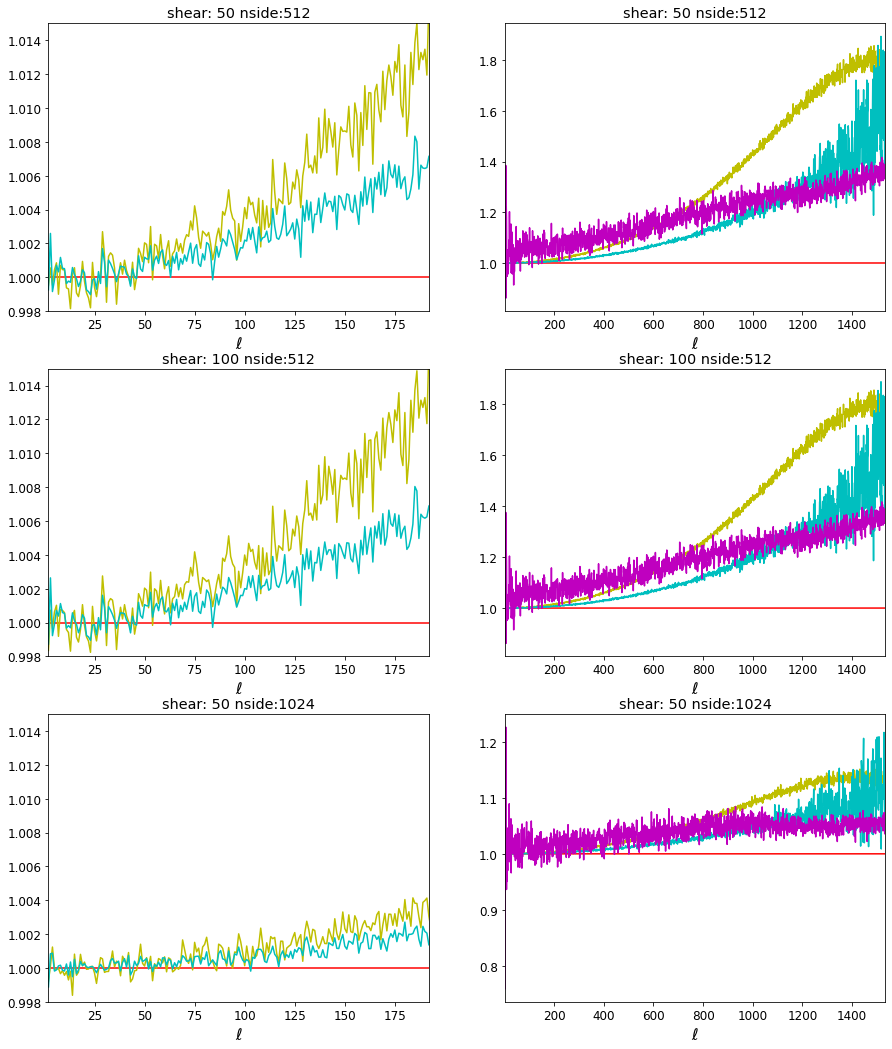

In [21]:
fig = plt.figure(constrained_layout=True, figsize=(15,18))
gs = GridSpec(3,2)
# The first subplot
ax = []
for g in gs:
    ax.append(fig.add_subplot(g))

ClsPlotter.plot(ld,new_50_512vsold,ax=ax[0], alpha=[1,1,1,0])
ClsPlotter.plot(ld,new_50_512vsold,ax=ax[1])
ClsPlotter.plot(ld,new_100_512vsold,ax=ax[2], alpha=[1,1,1,0])
ClsPlotter.plot(ld,new_100_512vsold,ax=ax[3])
ClsPlotter.plot(ld,neww_50_1024vsold,ax=ax[4], alpha=[1,1,1,0])
ClsPlotter.plot(ld,neww_50_1024vsold,ax=ax[5])

for i in 0,1:
    ax[i].set_title('shear: 50 nside:512')

for i in 2,3:
    ax[i].set_title('shear: 100 nside:512')

for i in 4,5:
    ax[i].set_title('shear: 50 nside:1024')


for i in 0,2,4:
    ax[i].set_ylim([0.998,1.015])
for i in 1,3,5:
    ax[i].set_xlim([2,max(ld)])
    
for axis in ax:
    axis.legend().set_visible(False)

In [42]:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])
ClsPlotter.plot(ld,new_50_512vsold,ax=ax0)
ClsPlotter.plot(ld,new_50_512vsold,ax=ax1)
ClsPlotter.plot(ld,new_50_512vsold,ax=ax3)
ax3.legend(loc='lower right')
ax3.set_ylim(0.99,1.015)
ax1.set_xlim([2,max(ld)])
for ax in ax0,ax1,ax3:
    ax.set_ylabel('$C_{\\ell \mathrm{new}}/C_{\\ell \mathrm{old}}$')
plt.suptitle('shear: 50 nside: 512', y=0.92)
plt.show()

<ipython-input-42-69760da2d900>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(gs[0,0])
<ipython-input-42-69760da2d900>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(gs[0,1])


<Figure size 432x288 with 0 Axes>